In [1]:
import math ; pi=math.pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
%matplotlib notebook
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import time
import json
import imp

In [2]:
import PySSC
import PySSC_AP

In [3]:
# If you want to change cosmology, specify the parameters with a dictionnary in the format of CLASS :
params = {'omega_b':0.022,'omega_cdm':0.12,'H0':67.,'n_s':0.96,'sigma8':0.81}

In [4]:
zstakes = np.linspace(0.2,1.5,num=14)
zmin = np.min(zstakes) ; zmax = np.max(zstakes)
# we have zmin zmax and 14 intermediates redshifts that define some boundaries

In [5]:
# Define redshift range
nz       = 500
z_arr    = np.linspace(0,2,num=nz+1)[1:] # Redshifts must be > 0

# TopHat window

In [6]:
nbins_T   = len(zstakes)-1
windows_T = np.zeros((nbins_T,nz))
for i in range(nbins_T):
    zminbin = zstakes[i] ; zmaxbin = zstakes[i+1] ; Dz = zmaxbin-zminbin
    for iz in range(nz):
        z = z_arr[iz]
        if ((z>zminbin) and (z<=zmaxbin)):
            windows_T[i,iz] = 1/Dz

In [8]:
imp.reload(PySSC_AP) #if needed

start_time = time.time()
Sijw_T = PySSC.Sij(z_arr,windows_T)
print(time.time() - start_time)
start_time = time.time()
Sijw_T_AngPow = PySSC_AP.Sij_AngPow(z_arr,windows_T,Lmax=1)
print(time.time() - start_time)

4.878689289093018
69.9809923171997


<IPython.core.display.Javascript object>


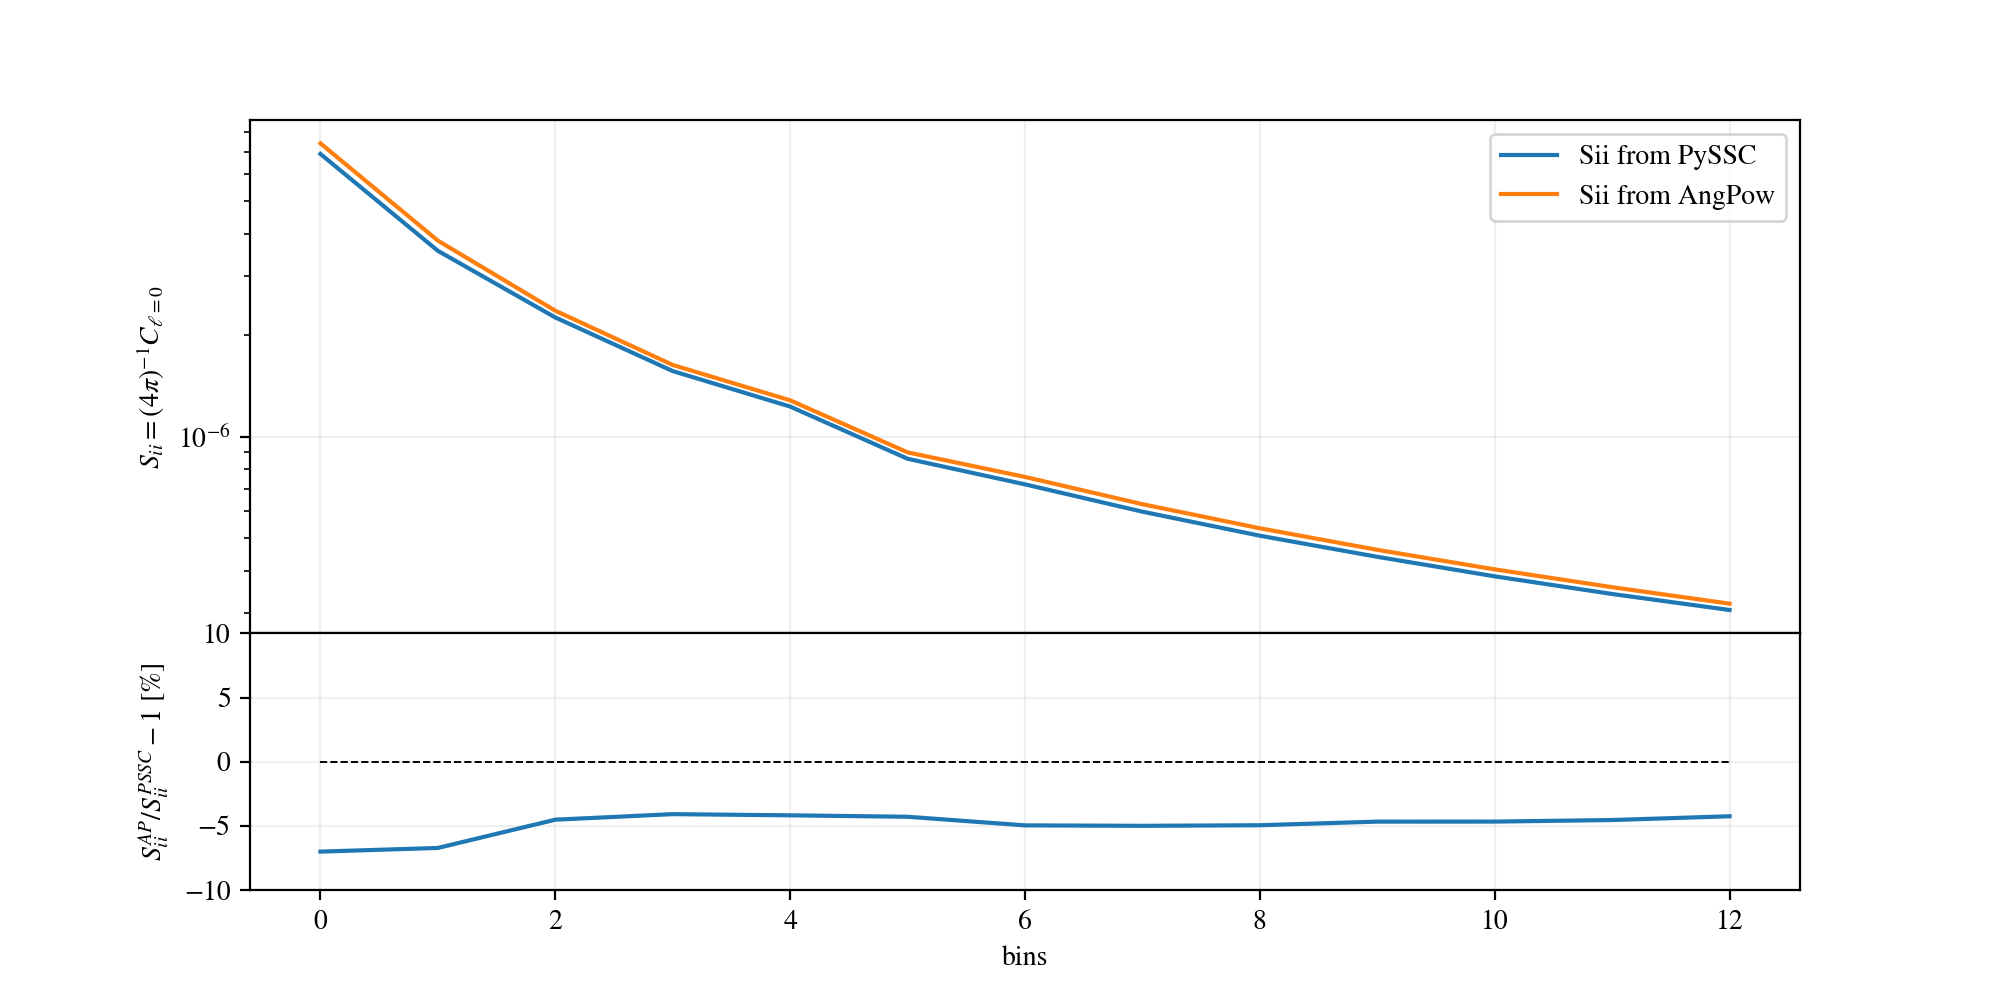

In [51]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_T),np.diag(Sijw_T),label='Sii from PySSC')
ax1.plot(np.arange(nbins_T),np.diag(Sijw_T_AngPow),label='Sii from AngPow')
ax2.set_xlabel('bins')
ax1.set_ylabel('$S_{ii}=(4\pi)^{-1}C_{\ell=0}$')
ax2.set_ylabel('$S_{ii}^{AP}/S_{ii}^{PSSC} -1\ [\%]$')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-10,10))
ax2.plot(np.arange(nbins_T),100*(np.diag(Sijw_T)/np.diag(Sijw_T_AngPow)-1))
ax2.plot(np.arange(nbins_T),np.zeros(nbins_T),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

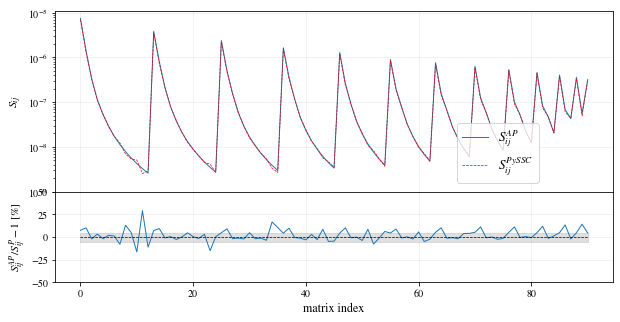

In [9]:
def plotting_offD(Sij):
    cov_vector = []
    for j,i in itertools.product(range(Sij.shape[0]),range(Sij.shape[1])):
        if i>=j:
            cov_vector.append(Sij[i,j])
    return (np.array(cov_vector));
    

cov_vector1 = plotting_offD(Sijw_T_AngPow)
cov_vector2 = plotting_offD(Sijw_T)

diff = ((Sijw_T_AngPow / Sijw_T)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{AP}/S_{ij}^{P} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{AP}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{PySSC}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

# Gaussian window 1

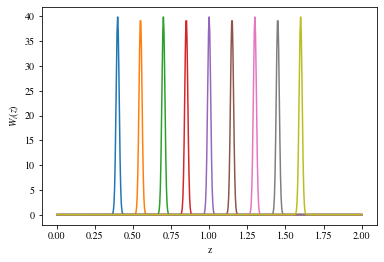

In [10]:
sigmaz    = 0.01
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
fig,ax=plt.subplots(1,1)
for i in range(nbins_G):
    ax.plot(z_arr,windows_G[i,:])
ax.set_xlabel('z') ; ax.set_ylabel('$W_i(z)$')
fig.show()

In [11]:
imp.reload(PySSC_AP) #if needed

start_time = time.time()
Sijw_G = PySSC.Sij(z_arr,windows_G)
print(time.time() - start_time)
start_time = time.time()
Sijw_G_AngPow = PySSC_AP.Sij_AngPow(z_arr,windows_G,Lmax=1)
print(time.time() - start_time)

4.1162497997283936
36.75815033912659


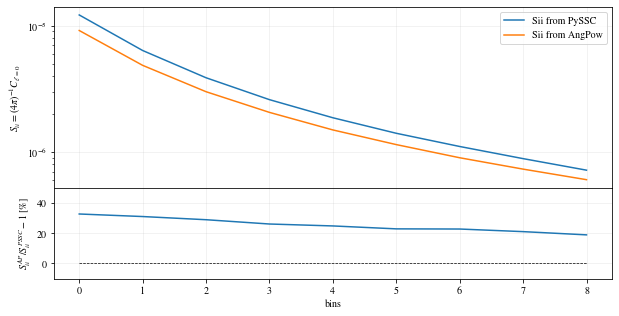

In [12]:
nbins_G = len(np.diag(Sijw_G))
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_G),np.diag(Sijw_G)   ,label='Sii from PySSC')
ax1.plot(np.arange(nbins_G),np.diag(Sijw_G_AngPow),label='Sii from AngPow')
ax2.set_xlabel('bins')
ax1.set_ylabel('$S_{ii}=(4\pi)^{-1}C_{\ell=0}$')
ax2.set_ylabel('$S_{ii}^{AP}/S_{ii}^{PSSC} -1\ [\%]$')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-10,50))
ax2.plot(np.arange(nbins_G),100*(np.diag(Sijw_G)/np.diag(Sijw_G_AngPow)-1))
ax2.plot(np.arange(nbins_G),np.zeros(nbins_G),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

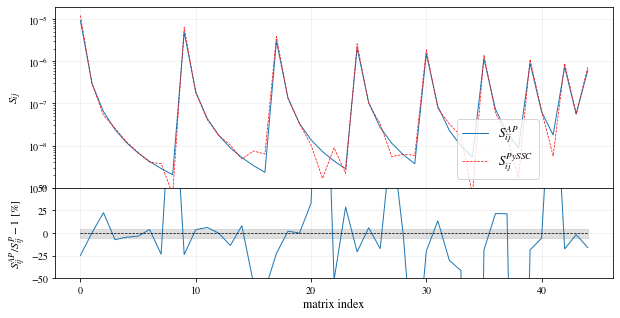

In [13]:
cov_vector1 = plotting_offD(Sijw_G_AngPow)
cov_vector2 = plotting_offD(Sijw_G)

diff = ((Sijw_G_AngPow / Sijw_G)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{AP}/S_{ij}^{P} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{AP}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{PySSC}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

# Gaussian window 2

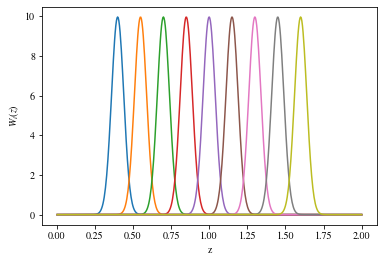

In [14]:
sigmaz    = 0.04
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
fig,ax=plt.subplots(1,1)
for i in range(nbins_G):
    ax.plot(z_arr,windows_G[i,:])
ax.set_xlabel('z') ; ax.set_ylabel('$W_i(z)$')
fig.show()

In [15]:
imp.reload(PySSC_AP) #if needed

start_time = time.time()
Sijw_G = PySSC.Sij(z_arr,windows_G)
print(time.time() - start_time)
start_time = time.time()
Sijw_G_AngPow = PySSC_AP.Sij_AngPow(z_arr,windows_G,Lmax=1)
print(time.time() - start_time)

3.848156690597534
36.10266184806824


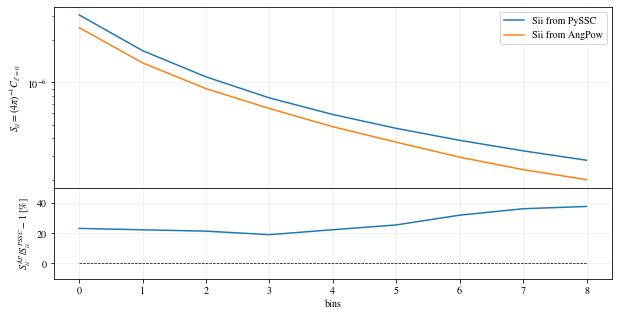

In [16]:
nbins_G = len(np.diag(Sijw_G))
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_G),np.diag(Sijw_G)   ,label='Sii from PySSC')
ax1.plot(np.arange(nbins_G),np.diag(Sijw_G_AngPow),label='Sii from AngPow')
ax2.set_xlabel('bins')
ax1.set_ylabel('$S_{ii}=(4\pi)^{-1}C_{\ell=0}$')
ax2.set_ylabel('$S_{ii}^{AP}/S_{ii}^{PSSC} -1\ [\%]$')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-10,50))
ax2.plot(np.arange(nbins_G),100*(np.diag(Sijw_G)/np.diag(Sijw_G_AngPow)-1))
ax2.plot(np.arange(nbins_G),np.zeros(nbins_G),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

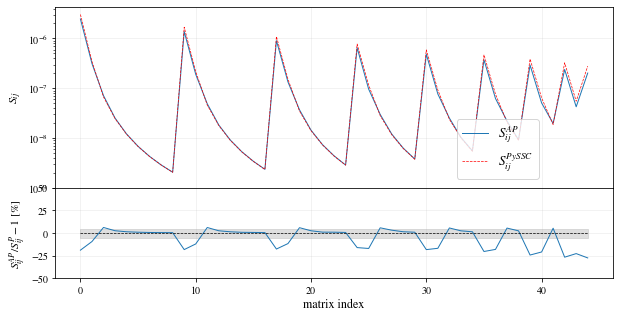

In [17]:
cov_vector1 = plotting_offD(Sijw_G_AngPow)
cov_vector2 = plotting_offD(Sijw_G)

diff = ((Sijw_G_AngPow / Sijw_G)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{AP}/S_{ij}^{P} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{AP}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{PySSC}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

# Dirac window 
### (need to adapt precision)

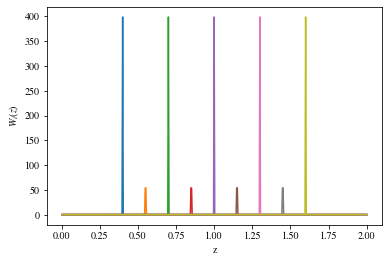

In [18]:
sigmaz    = 0.001
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
fig,ax=plt.subplots(1,1)
for i in range(nbins_G):
    ax.plot(z_arr,windows_G[i,:])
ax.set_xlabel('z') ; ax.set_ylabel('$W_i(z)$')
fig.show()

In [19]:
imp.reload(PySSC_AP) #if needed

start_time = time.time()
Sijw_G = PySSC.Sij(z_arr,windows_G)
print(time.time() - start_time)
start_time = time.time()
Sijw_G_AngPow = PySSC_AP.Sij_AngPow(z_arr,windows_G,Lmax=1)
print(time.time() - start_time)

3.884091377258301
36.00506901741028


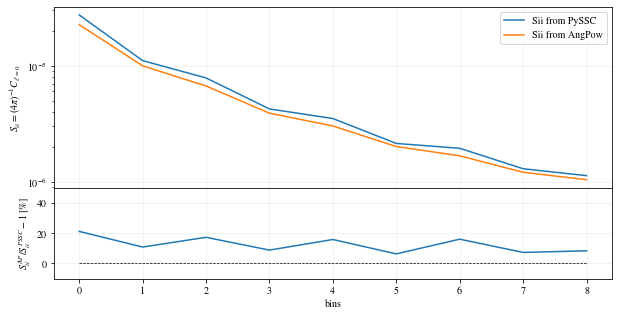

In [20]:
nbins_G = len(np.diag(Sijw_G))
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_G),np.diag(Sijw_G)   ,label='Sii from PySSC')
ax1.plot(np.arange(nbins_G),np.diag(Sijw_G_AngPow),label='Sii from AngPow')
ax2.set_xlabel('bins')
ax1.set_ylabel('$S_{ii}=(4\pi)^{-1}C_{\ell=0}$')
ax2.set_ylabel('$S_{ii}^{AP}/S_{ii}^{PSSC} -1\ [\%]$')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-10,50))
ax2.plot(np.arange(nbins_G),100*(np.diag(Sijw_G)/np.diag(Sijw_G_AngPow)-1))
ax2.plot(np.arange(nbins_G),np.zeros(nbins_G),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

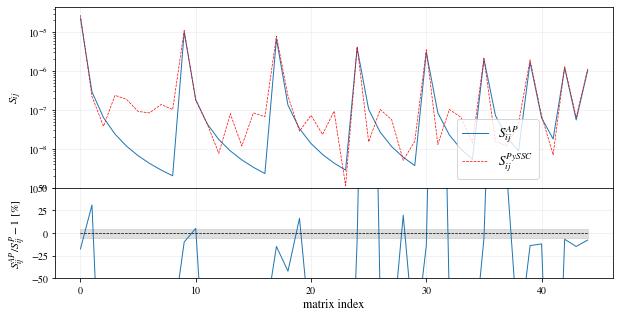

In [21]:
cov_vector1 = plotting_offD(Sijw_G_AngPow)
cov_vector2 = plotting_offD(Sijw_G)

diff = ((Sijw_G_AngPow / Sijw_G)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{AP}/S_{ij}^{P} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{AP}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{PySSC}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()